In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from scipy import stats
from scipy.stats.mstats import gmean
from sklearn.metrics import mean_absolute_error

In [2]:
Vref_f = float(input('\nFrequencia: '))
Vin_f = Vref_f
Vin_B = float(input('\nAmplitude do Sinal de Entrada: '))
Vin_w = 2*np.pi*Vin_f
Vin_theta = float(input('\nFase do Sinal de Entrada: '))
Vref_A = 1 # Amplitude precisa ser 1
Vref_w = 2*np.pi*Vref_f
ruido = 2
pontos = 20000


Frequencia: 60

Amplitude do Sinal de Entrada: 10

Fase do Sinal de Entrada: 30


In [3]:
array_fase = []
array_mag = []

for q in range(100):
    array_seno_ref = np.array([Vref_A*(np.sin(Vref_f*2*np.pi*a/pontos)) for a in range(pontos)])
    array_seno_ref90 = np.array([Vref_A*(np.cos(Vref_f*2*np.pi*a/pontos)) for a in range(pontos)])
    array_seno_in = np.array([Vin_B*np.sin(Vin_w*a/pontos+Vin_theta*np.pi/180)+(ruido* np.random.random()-1)-(ruido* np.random.random()-1) for a in range(pontos)])
    array_seno_in2 = np.array([Vin_B*np.sin(Vin_w*a/pontos+Vin_theta*np.pi/180) for a in range(pontos)])

    def lowpass(x, alpha):
        data = [x[0]]
        for a in x[1:]:
            data.append(data[-1] + (alpha*(a-data[-1])))
        return np.array(data)

    multiplicacao = np.multiply(array_seno_ref,array_seno_in)
    passa_baixo = np.abs(lowpass(np.array(multiplicacao), 0.0011))

    multiplicacao2 = np.multiply(array_seno_ref90,array_seno_in)
    passa_baixo2 = np.abs(lowpass(np.array(multiplicacao2), 0.0011))

    MAG = 2*np.sqrt((np.square(passa_baixo2)+ np.square(passa_baixo)))
    FASE = np.arctan(np.divide(np.array(passa_baixo2[3:], dtype=float), np.array(passa_baixo[3:], dtype=float)))*180/np.pi

    media_fase = np.mean(FASE[5000:])
    media_mag = np.mean(MAG[5000:])
    
    array_fase.append(media_fase)
    array_mag.append(media_mag)

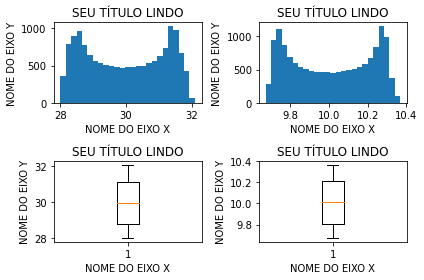

In [4]:
plt.subplot(2,2,1)
plt.title('SEU TÍTULO LINDO')
plt.xlabel('NOME DO EIXO X')
plt.ylabel('NOME DO EIXO Y')
plt.hist(FASE[5000:],bins=25)
plt.subplot(2,2,2)
plt.title('SEU TÍTULO LINDO')
plt.xlabel('NOME DO EIXO X')
plt.ylabel('NOME DO EIXO Y')
plt.hist(MAG[5000:],bins=25)
plt.subplot(2,2,3)
plt.title('SEU TÍTULO LINDO')
plt.xlabel('NOME DO EIXO X')
plt.ylabel('NOME DO EIXO Y')
plt.boxplot(FASE[5000:])
plt.subplot(2,2,4)
plt.title('SEU TÍTULO LINDO')
plt.xlabel('NOME DO EIXO X')
plt.ylabel('NOME DO EIXO Y')
plt.boxplot(MAG[5000:])
plt.tight_layout()
plt.show()

In [5]:
desviopadrao_fase = statistics.stdev(array_fase)
desviopadrao_mag = statistics.stdev(array_mag)
variance_fase = statistics.variance(array_fase)
variance_mag = statistics.variance(array_mag)
true_fase = np.array([Vin_theta for a in range(100)])
true_mag = np.array([Vin_B for a in range(100)])
MSE_fase = np.square(np.subtract(true_fase,array_fase)).mean()
MSE_mag = np.square(np.subtract(true_mag,array_mag)).mean()
MAE_fase = mean_absolute_error(true_fase,array_fase)
MAE_mag = mean_absolute_error(true_mag,array_mag)
print('MAE_Fase: ',MAE_fase)
print('MAE_Mag: ',MAE_mag)
print('MSE_Fase: ',MSE_fase)
print('MSE_Mag: ',MSE_mag)
print('\nDesvio Padrão Amplitude: ',desviopadrao_mag, '\nDesvio Padrão Fase: ',desviopadrao_fase)
print('\nVariancia Amplitude: ',variance_mag, '\nVariancia Fase: ',variance_fase)

MAE_Fase:  0.03452401214605939
MAE_Mag:  0.007365324980381001
MSE_Fase:  0.0019460922099990277
MSE_Mag:  9.330088584108529e-05

Desvio Padrão Amplitude:  0.009266007526673692 
Desvio Padrão Fase:  0.04312360767818633

Variancia Amplitude:  8.58588954843735e-05 
Variancia Fase:  0.0018596455391821308


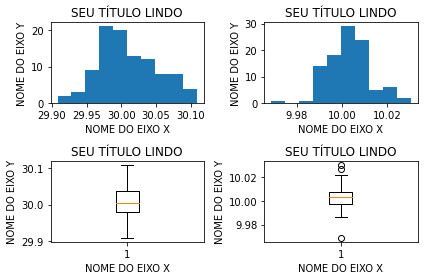

In [6]:
plt.subplot(2,2,1)
plt.hist(array_fase,bins=10)
plt.title('SEU TÍTULO LINDO')
plt.xlabel('NOME DO EIXO X')
plt.ylabel('NOME DO EIXO Y')
plt.subplot(2,2,2)
plt.hist(array_mag,bins=10)
plt.title('SEU TÍTULO LINDO')
plt.xlabel('NOME DO EIXO X')
plt.ylabel('NOME DO EIXO Y')
plt.subplot(2,2,3)
plt.boxplot(array_fase)
plt.title('SEU TÍTULO LINDO')
plt.xlabel('NOME DO EIXO X')
plt.ylabel('NOME DO EIXO Y')
plt.subplot(2,2,4)
plt.boxplot(array_mag)
plt.title('SEU TÍTULO LINDO')
plt.xlabel('NOME DO EIXO X')
plt.ylabel('NOME DO EIXO Y')
plt.tight_layout()
plt.show()

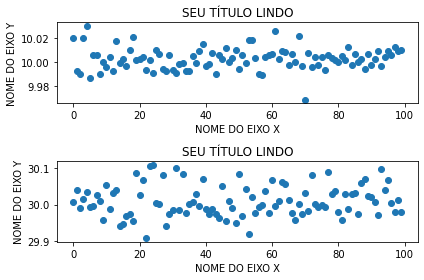

In [7]:
plt.subplot(2,1,1)
plt.plot(array_mag, 'o')
plt.title('SEU TÍTULO LINDO')
plt.xlabel('NOME DO EIXO X')
plt.ylabel('NOME DO EIXO Y')
plt.subplot(2,1,2)
plt.plot(array_fase, 'o')
plt.title('SEU TÍTULO LINDO')
plt.xlabel('NOME DO EIXO X')
plt.ylabel('NOME DO EIXO Y')
plt.tight_layout()
plt.show()